In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sys import path
path.append('D:/DS/mbs-analytics')
__package__ = 'spg'

In [3]:
from lib.prepay import PSA, RichardRoll, ToyModel

In [4]:
from lib.util import smm2cpr, cpr2smm

In [5]:
psa_model = PSA()
rr_model = RichardRoll()
toy_model = ToyModel()

# PSA curve

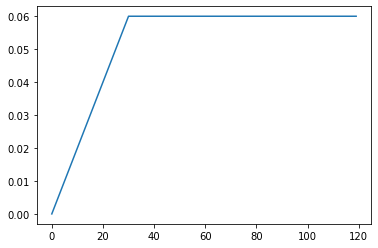

In [6]:
wala = np.arange(0, 120)
psa_cpr = smm2cpr(psa_model({'wala': wala}))
plt.plot(wala, psa_cpr)

# RR Model

In [7]:
month = wala%12 + 1

In [8]:
# generate some random number
noise = np.random.normal(0, 0.02/np.sqrt(12), (500, 360))

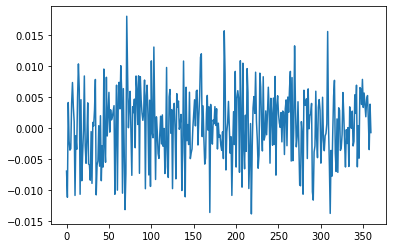

In [9]:
plt.plot(noise[0, :])

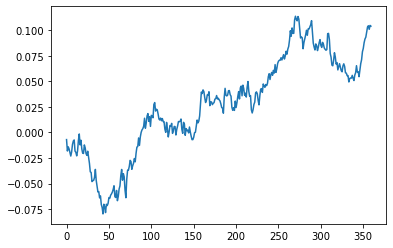

In [10]:
plt.plot(np.cumsum(noise[0, :]))

In [11]:
mrates = np.cumsum(noise, 1) + 0.07

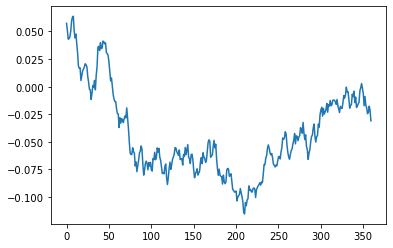

In [12]:
plt.plot(mrates[2, :])

In [13]:
rr_smm = rr_model({'wala': wala,
                   'coupon': 0.07,
                   'mrate': mrates[2, :120],
                   'month':month})

In [14]:
rr_cpr = smm2cpr(rr_smm)

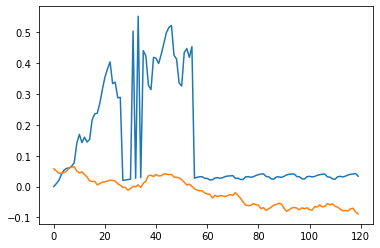

In [15]:
plt.plot(rr_cpr)
plt.plot(mrates[2, :120])

# Toy model

In [16]:
toy_smm = toy_model({'wala':wala,
                     'incentive': (0.07-mrates[2, :120])*10000})

In [17]:
toy_cpr = smm2cpr(toy_smm)

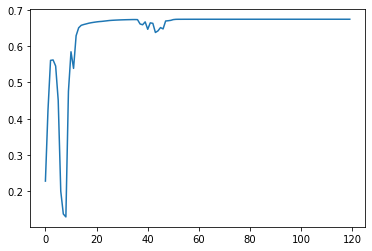

In [18]:
plt.plot(toy_cpr)

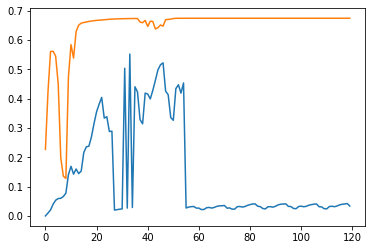

In [19]:
plt.plot(rr_cpr)
plt.plot(toy_cpr)

# multiple paths

In [27]:
toy_smm500 = toy_model({'wala':wala,
                     'incentive': (0.07-mrates[:, :120])*10000})

In [28]:
rr_smm500 = rr_model({'wala': wala,
                   'coupon': 0.07,
                   'mrate': mrates[:, :120],
                   'month':month})

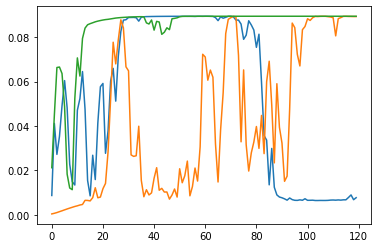

In [30]:
plt.plot(toy_smm500[0,:])
plt.plot(toy_smm500[1,:])
plt.plot(toy_smm500[2,:])

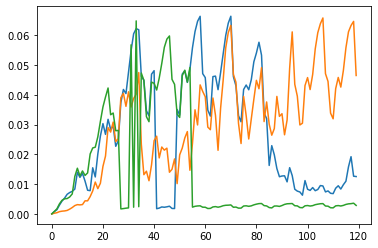

In [31]:
plt.plot(rr_smm500[0,:])
plt.plot(rr_smm500[1,:])
plt.plot(rr_smm500[2,:])

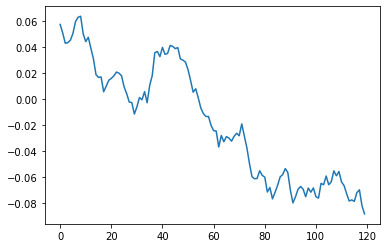

In [33]:
plt.plot(mrates[2, :120])